# AI 이미지 생성 

https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/


```
@misc{wood2022kerascv,
  title={KerasCV},
  author={Wood, Luke and Tan, Zhenyu and Ian, Stenbit and Zhu, Scott and Chollet, Fran\c{c}ois and others},
  year={2022},
  howpublished={\url{https://github.com/keras-team/keras-cv}},
}
```

In [1]:
!nvidia-smi

Fri Dec  2 09:12:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394 kB 22.2 MB/s 


In [3]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

## Stable Diffustion 모델 로드

In [10]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 1s 0us/step


In [11]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()

## 첫 번째 이미지 생성

> 우주인이 말을 타고 있는 사진

25/25 [==============================] - 78s 2s/step


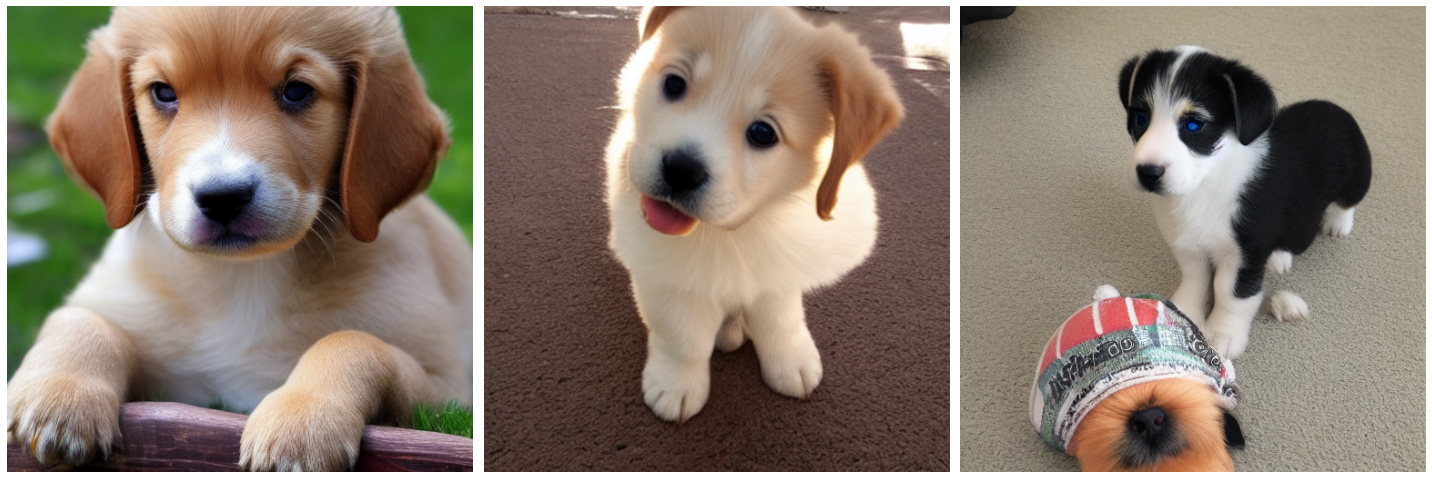

In [12]:
images = model.text_to_image("puppy", batch_size=3)

plot_images(images)

## 한글 -> 영어 번역

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("펭귄이 곰한테 뽀뽀하는 모습")

translation

'A penguin kisses a bear'

## 함수화

펭귄이 곰한테 뽀뽀하는 모습
A penguin kisses a bear
25/25 [==============================] - 61s 2s/step


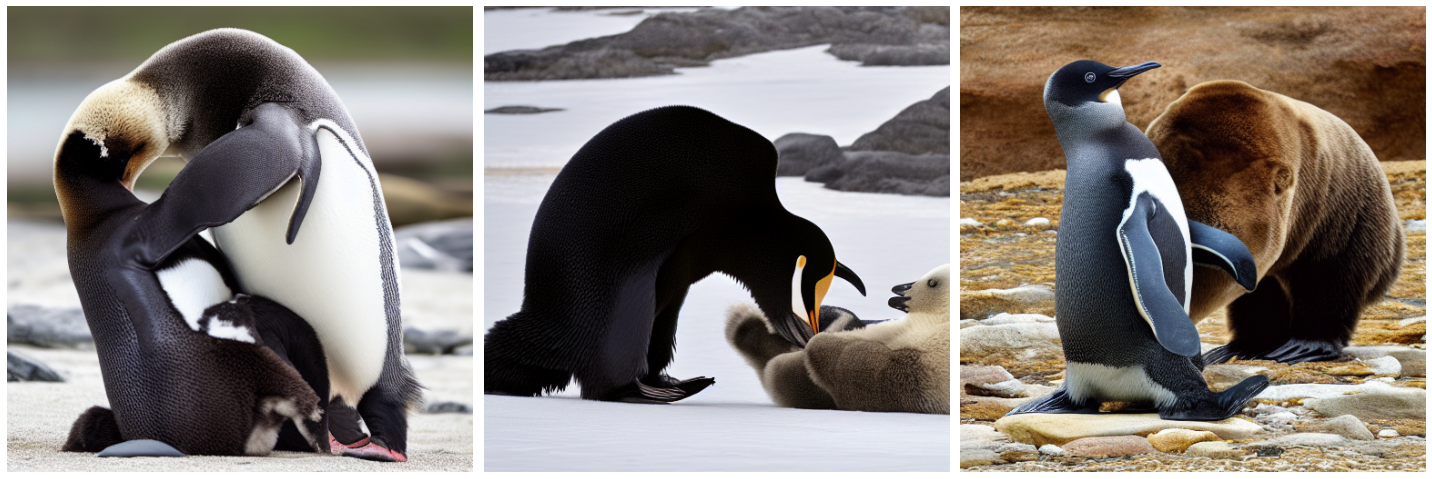

In [ ]:
def generate_images(text, n=3):
    print(text)
    translation = translator.translate(text)
    print(translation)

    images = model.text_to_image(translation, batch_size=n)

    return images

images = generate_images("펭귄이 곰한테 뽀뽀하는 모습")

plot_images(images)

## 그림 생성 앱 만들기

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 11.6 MB 7.0 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 106 kB 76.1 MB/s 
     |████████████████████████████████| 212 kB 74.7 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 2.3 MB 49.6 MB/s 
     |████████████████████████████████| 272 kB 63.7 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 4.0 MB 56.6 MB/s 
     |████████████████████████████████| 593 kB 55.4 MB/s 
     |████████████████████████████████| 856 kB 70.7 MB/s 


In [ ]:
import gradio as gr

def inference(text):
    image = generate_images(text, 1).squeeze()
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

두부
Tofu
25/25 [==============================] - 40s 1s/step


In [5]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 20.7 MB/s 
     |████████████████████████████████| 4.7 MB 41.5 MB/s 
     |████████████████████████████████| 237 kB 61.5 MB/s 
     |████████████████████████████████| 78 kB 4.7 MB/s 
     |████████████████████████████████| 182 kB 50.5 MB/s 
     |████████████████████████████████| 164 kB 69.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 3.5 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=a230384fd804aac55b2cb04d07398a740047c5f7f9248082bfcce61097523122
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [6]:
import streamlit as st
import urllib.request

In [8]:
def main():

  
    st.title('ㅎㅇ')


In [9]:

main()

  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-12-02 09:16:09.476 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
